In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [226]:
# pip install nltk

In [227]:
import nltk
# nltk.download()

In [228]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('russian')

In [229]:
df = pd.read_excel('data/moi2013_221223.xlsx')
display(df.head())

,number,date,station,industry,Вопрос,violation,object,criticality,status,responsible,Дата устранения (план),date_of_elimination,В срок
0,СВЕРД-270423/38,01.01.2023 20:22,-,П,-,Выплеск 3 шпальных ящика (перегон Куть-Ях –Юнг...,-,Стандартное,На экспертизе,Костылев Евгений Аркадьевич,-,-,Без срока
1,СВЕРД-120123/19,02.01.2023 06:00,ВЕРХНЯЯ,П,-,в КМО от 05.12.22 5 замечаний не устранены с...,-,Стандартное,На устранении,Газизов Альберт Рашитович,-,-,Без срока
2,СВЕРД-030123/3,02.01.2023 12:22,МАЛЫЙ ОСТРОВ,П,-,2446 км 5 ПК по 2449 км 3 ПК по 2му пути огран...,NaN,Стандартное,На устранении,Халилов Максим Рафаилович,-,-,Без срока
3,СВЕРД-070123/4,02.01.2023 17:36,ЕКАТЕРИНБУРГ-СОРТИРОВОЧНЫЙ,Т,-,Проверка электровоза 2эс10-040.выявлено:\n1.не...,NaN,Стандартное,На устранении,Филозопов Антон Владимирович,-,-,Без срока
4,СВЕРД-030123/1,03.01.2023 07:38,ПРИОБЬЕ,П,-,Стрелку №23 очистить от снега,-,Стандартное,Завершено,cherepanovad@svrw.oao.rzd,-,20.01.2023 13:26,Без срока


In [230]:
# Объединяем данные из колонки 'Title'
text = ' '.join(df['violation'].astype('str'))

In [231]:
# f = open('pushkin-metel.txt', "r", encoding="utf-8")
# text = f.read()
text = text.lower()


In [232]:
# Используем стандартный набор символов пунктуации из модуля string:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [233]:
#  Добавим к знакам пунктуации символы переноса строки, табуляции и другие символы, 
# которые встречаются в нашем исходном тексте
spec_chars = string.punctuation + '\n\xa0«»\t—…' 

In [234]:
# Для удаления символов используем поэлементную обработку строки – разделим исходную строку text на символы, 
# оставим только символы, не входящие в набор spec_chars и снова объединим список символов в строку:
text = "".join([ch for ch in text if ch not in spec_chars])

In [235]:
# Можно объявить простую функцию, которая удаляет указанный набор символов из исходного текста:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [236]:
# Её можно использовать как для удаления спец.символов, так и для удаления цифр из исходного текста:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [237]:
# Для последующей обработки очищенный текст необходимо разбить на составные части – токены. 
# В анализе текста на естественном языке применяется разбиение на символы, слова и предложения. 
# Процесс разбиения называется токенизация. Для нашей задачи частотного анализа необходимо разбить текст на слова. 
# Для этого можно использовать готовый метод библиотеки NLTK:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [238]:
# Переменная text_tokens представляет собой список слов (токенов). 
# Для вычисления количества слов в предобработанном тексте можно получить длину списка токенов:
len(text_tokens)

85012

In [239]:
# Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, 
# который входит в эту библиотеку:
import nltk
text = nltk.Text(text_tokens)

In [240]:
# Для подсчёта статистики распределения частот слов в тексте применяется класс FreqDist (frequency distributions):
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [241]:
# Также можно воспользоваться методом most_common для получения списка кортежей с наиболее часто встречающимися токенами:
fdist.most_common(5)

[('в', 2390), ('на', 2335), ('не', 2023), ('№', 1941), ('и', 979)]

In [242]:
# Удаление стоп-слов. Библиотека NLTK содержит готовые списки стоп-слов для различных языков. 
# Получим список сто-слов для русского языка:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [243]:
# russian_stopwords

In [244]:
# замена слов в тексте
text2 = text
text2 = [i.replace('скорости', 'знаки_ограничения_скорости') for i in text2]
text2 = [i.replace('ограждения', 'знаки_ограждения') for i in text2]
text2 = [i.replace('горит', 'не_горит_лампа') for i in text2]
text2 = [i.replace('опасного', 'знаки') for i in text2]
text2 = [i.replace('тормозной башмак', 'тормозной_башмак') for i in text2]
# text2 = text


In [245]:
# Список стоп-слов может быть расширен с помощью стандартного метода extend:

russian_stopwords.extend(['это', 'км', '№', 'пк', 'г', 'мм',  'заменить', 'парк', 'путь', 'пути',
                          'заменить', 'стрелка','отсутствует', 'перегон', 'стороны','перевод', 'кв', 
                          'б','сп', 'нить','ст', 'станция', 'стрелочный', 'тормозной', 'номер', 'вл',
                          'отсутствуют', 'м', 'междупутье', 'стр', 'поезд', 'зв','кмч', 'согласно', 
                          'месте', 'станции', 'требуется', 'отсутствие', 'месте', 'места', 'отрегулировать', 
                          '–', 'скорость', 'рабочем', 'стыковой', 'кмпк', 'ду', 'работы', 'парке', 'шт', 
                          'замечания', 'работает', 'ограничений', 'четный', 'ручки', 'пэ', 'убрать', 'частично', 
                          'необходимо', 'смены', 'неисправный', 'пэ', 'имеется', 'изъят', 'горит', 'опасного'])

In [246]:
# удаление стоп-слов
text = [word for word in text if word not in russian_stopwords]
text2 = [word for word in text2 if word not in russian_stopwords]

In [247]:
# После удаления стоп-слов частота распределения токенов в тексте выглядит следующим образом:
fdist = FreqDist(text2)
fdist.most_common(30)


[('снега', 276),
 ('шпалы', 270),
 ('вагон', 258),
 ('знаков', 220),
 ('знаки_ограждения', 216),
 ('крестовины', 210),
 ('масла', 209),
 ('переезд', 207),
 ('очистить', 206),
 ('опора', 199),
 ('знаки_ограничения_скорости', 192),
 ('опоры', 176),
 ('не_горит_лампа', 175),
 ('рельс', 169),
 ('связи', 167),
 ('диэлектрических', 158),
 ('знаки', 156),
 ('заземления', 152),
 ('очищены', 148),
 ('проверки', 145),
 ('лампы', 143),
 ('сигнальных', 135),
 ('рельса', 131),
 ('сцб', 128),
 ('башмак', 122),
 ('бмрц', 121),
 ('желоба', 116),
 ('освещение', 113),
 ('локомотив', 112),
 ('износ', 112)]

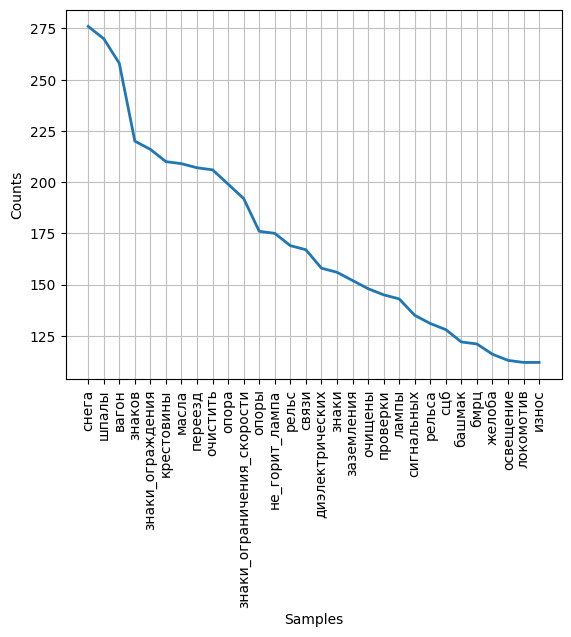

In [248]:
# Частота распределения слов тексте может быть визуализирована с помощью графика
# fdist.plot(30,cumulative=False)


fdist.plot(30,cumulative=False)
# fdist.plot(30,cumulative=False)
# plt.title('График данных')
# lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
# lineplot.set_xlabel('Год выпуска')
# lineplot.set_ylabel('Сумарный объем продаж');
plt.show()

In [249]:
# визуализируем результаты частотного анализа текста в виде «облака слов»
# pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
# Для преобразования списка токенов после предобработки и удаления стоп-слов воспользуемся методом join, указав в качестве разделителя пробел:
text_raw = " ".join(text)
# Выполним вызов метода построения облака:
wordcloud = WordCloud().generate(text_raw)


(-0.5, 399.5, 199.5, -0.5)

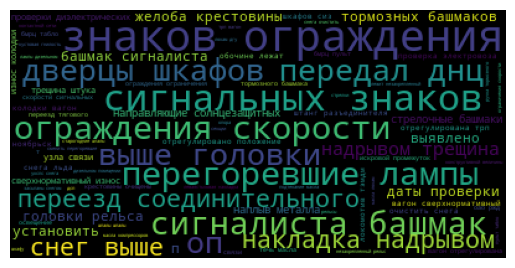

In [251]:
# Выводим облако слов на экран
plt.imshow(wordcloud)
# Отключаем отображение осей
plt.axis('off')

In [252]:

pd.set_option("display.max_rows", None)
df[df['status'] == 'На устранении']['responsible'].value_counts()

responsible
-                                   2809
Казарин Александр Сергеевич          118
Паламарчук Иван Викторович           106
Трофимов Александр Анатольевич        96
Кожевников Сергей Юрьевич             60
Филозопов Антон Владимирович          58
Халилов Максим Рафаилович             55
Каплунский Андрей Васильевич          53
Бугай Николай Михайлович              52
Попов Алексей Владимирович            47
Гадиев Искандер Ибрагимович           46
Краев Антон Александрович             41
Нагайцев Егор Константинович          38
Алтынбаев Руслан Рашитович            31
Тараканов Станислав Аркадьевич        31
akovinov@svrw.oao.rzd                 23
Газизов Альберт Рашитович             22
aasuturihin@svrw.oao.rzd              21
Старков Дмитрий Александрович         21
Голозубов Максим Евгеньевич           20
Кузнецов Андрей Владимирович          19
Новиков Юрий Владимирович             19
Частухин Дмитрий Владимирович         18
Ефимов Григорий Вадимович             17
ekor